In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn import model_selection
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE
from imblearn.combine import SMOTEENN,SMOTETomek

import warnings 
warnings.filterwarnings(action='ignore')

#### 1.) 기초 통계분석 & 성능평가 / 모델링함수 작성 

In [2]:
def describex(data):
        data = pd.DataFrame(data)
        stats = data.describe()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        skewness_df = pd.DataFrame({'skewness':skewness}).T
        kurtosis_df = pd.DataFrame({'kurtosis':kurtosis}).T
        Appended_Stats = pd.concat([stats,skewness_df,kurtosis_df],axis=0)
        return Appended_Stats
    
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    f1 = f1_score(y_test,pred)
    print('Confusion Matrix')
    print(confusion)
    print('\n')
    print('정확도:',np.round(accuracy,3),'정밀도:', np.round(precision,3),'재현율:',np.round(recall,3),'AUC:',roc_auc,'F1:',np.round(f1,3))
    
def test_model(model):
    ml = model
    ml.fit(X_train,y_train)      
    pred = ml.predict(X_test)
    pred_proba = ml.predict_proba(X_test)[:,1]
    print('----------------------------------------------------------------------------------------------------------')
    get_clf_eval(y_test,pred,pred_proba)  
    print('\n')
    print(classification_report(y_test, pred,target_names=['양품','불량']))
    if model == rf:
        print('RandomForest Prediction Result')
        print('\n')     
    elif model == rf_bal:
        print('RandomForest(Balanced Weight) Prediction Result')
        print('\n')          
    elif model == ada:
        print('AdaBoost Prediction Result')
        print('\n')    
    elif model == gbm:
        print('GradientBoostingMachine Prediction Result')
        print('\n')        
    elif model == xgb:
        print('XGBoost Prediction Result')
        print('\n')       
    elif model == xgb_bal:
        print('XGBoost(Balanced Weight) Prediction Result')
        print('\n')           
    elif model == lgbm:
        print('LightGBM Prediction')
        print('\n')           
    elif model == lgbm_bal:
        print('LightGBM(Balanced Weight) Prediction Result')
        

def Oversampling_Test(model):
    for i in list(np.arange(0.65,1.05,0.05).round(2)): # sampling_strategy = 0.65, 0.7 , 0.75, 0.8 ,0.85, 0.9, 0.95, 1.0
        oversampler = SMOTEENN(sampling_strategy=i,random_state=2021)
        X_train_over,y_train_over = oversampler.fit_resample(X_train,y_train)
        ml = model
        ml.fit(X_train_over,y_train_over) 
        pred = ml.predict(X_test)
        pred_proba = ml.predict_proba(X_test)[:,1]
        get_clf_eval(y_test,pred,pred_proba)  
        print('\n')
        print(classification_report(y_test, pred,target_names=['양품','불량']))     
        if model == rf:
            print('RandomForest SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')            
        elif model == rf_bal:
            print('RandomForest(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')   
        elif model == ada:
            print('AdaBoost SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
        elif model == gbm:
            print('GradientBoostingMachine SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
        elif model == xgb:
            print('XGBoost SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')           
        elif model == xgb_bal:
            print('XGBoost(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    
        elif model == lgbm:
            print('LightGBM SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')             
        elif model == lgbm_bal:
            print('LightGBM(Balanced Weight) SMOTEENN'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')          


def Undersampling_Test(model):
    for i in list(np.arange(0.65,1.05,0.05).round(2)): # sampling_strategy = 0.65, 0.7 , 0.75, 0.8 ,0.85, 0.9, 0.95, 1.0
        undersampler = RandomUnderSampler(sampling_strategy=i,random_state=2021) 
        X_train_under,y_train_under = undersampler.fit_resample(X_train,y_train)
        ml = model
        ml.fit(X_train_under,y_train_under) 
        pred = ml.predict(X_test)
        pred_proba = ml.predict_proba(X_test)[:,1]
        get_clf_eval(y_test,pred,pred_proba)  
        print('\n')
        print(classification_report(y_test, pred,target_names=['양품','불량']))
        if model == rf:
            print('RandomForest ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')  
        elif model == rf_bal:
            print('RandomForest(Balanced Weight) ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    
        elif model == ada:
            print('AdaBoost ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
        elif model == gbm:
            print('GradientBoostingMachine ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')
        elif model == xgb:
            print('XGBoost ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')  
        elif model == xgb_bal:
            print('XGBoost(Balanced Weight) ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')    
        elif model == lgbm:
            print('LightGBM ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')        
        elif model == lgbm_bal:
            print('LightGBM(Balanced Weight) ROS'+'='+str(i),'Prediction Result')
            print('------------------------------------------------------------------------------------------------------')
            print('\n')          

#### 2.) 샘플데이터 업로드 

In [3]:
df = pd.read_excel('20240627_A3EA1_DATA_RG3-L (rev03)_copy.xlsx')
df.shape

(20519, 61)

### Column 정의 

#### 1.) X-Y변수 조합 완성
- 조립공정
- 병렬공정 

In [4]:
### 1-1.) 병렬공정 데이터 
col_S32 = df.loc[:, df.columns.str.contains('S32')].columns.tolist()
col_S34 = df.loc[:, df.columns.str.contains('S34')].columns.tolist()
col_S70 = df.loc[:, df.columns.str.contains('S70')].columns.tolist()
col_S71 = df.loc[:, df.columns.str.contains('S71')].columns.tolist()

parallel_1 = col_S32 + col_S70 # 
parallel_2 = col_S32 + col_S71 # 
parallel_3 = col_S34 + col_S70 # 
parallel_4 = col_S34 + col_S71 # 

### 1-2.) 조립공정 데이터 
col_S230 = df.loc[:, df.columns.str.contains('S230')].columns.tolist()
col_S240 = df.loc[:, df.columns.str.contains('S240')].columns.tolist()

### 1-3.) 결과 데이터
col_CW = df.loc[:, df.columns.str.contains('_CW')].columns.tolist()
col_CCW = df.loc[:, df.columns.str.contains('_CCW')].columns.tolist()

print('병렬공정')
print('[col_S32 + col_S70] ==>',df[parallel_1].dropna().shape)
print('[col_S32 + col_S71] ==>',df[parallel_2].dropna().shape)
print('[col_S34 + col_S70] ==>',df[parallel_3].dropna().shape)
print('[col_S34 + col_S71] ==>',df[parallel_4].dropna().shape)

print('\n')
print('조립공정')
print('[col_S230 + col_S240] ==>',df[col_S230+col_S240].dropna().shape)

병렬공정
[col_S32 + col_S70] ==> (4991, 19)
[col_S32 + col_S71] ==> (4736, 19)
[col_S34 + col_S70] ==> (5426, 19)
[col_S34 + col_S71] ==> (5318, 19)


조립공정
[col_S230 + col_S240] ==> (20443, 11)


#### 1.) 조립공정 분석
- CW, CCW Harmonic Order 대상
- Cogging_Torque Harmonic Order 분포 이상값 정의
- Cogging_Torque Harmonic Order 이상값 경계선 기준 Target= 0,1로 변환 (정상/불량)
- 지도학습 모델링 적용

In [6]:
df_filter_1 = df[col_S230 + col_S240 + col_CW + col_CCW].dropna().reset_index(drop=True)

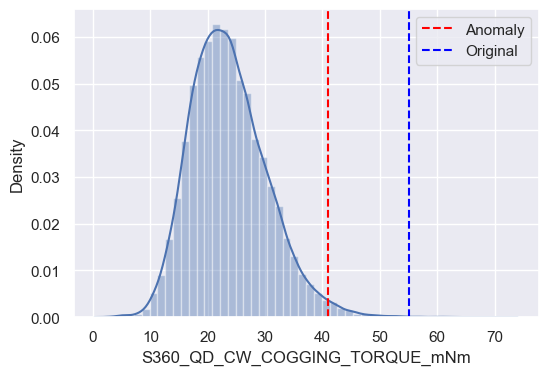

기존 임계값 ==> 55
0    20436
1        7
Name: S360_QD_CW_COGGING_TORQUE_mNm, dtype: int64
불량률= 0.034241549674705274 %


Q3 + 1.5*IQR ==>  40.9525
0    20166
1      277
Name: S360_QD_CW_COGGING_TORQUE_mNm, dtype: int64
불량률= 1.3549870371276231 %




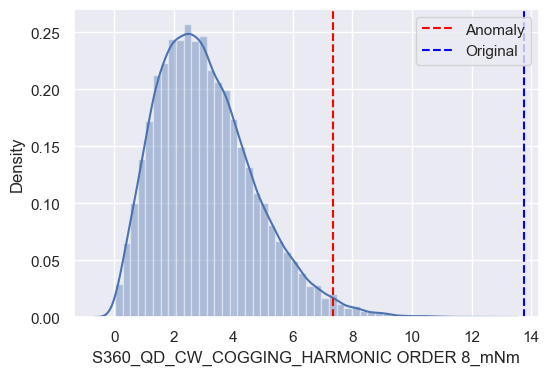

기존 임계값 ==> 13.75
0    20443
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


Q3 + 1.5*IQR ==>  7.350775
0    20127
1      316
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
불량률= 1.545761385315267 %




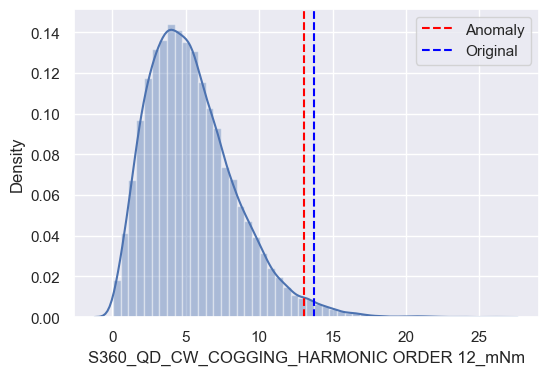

기존 임계값 ==> 13.75
0    20443
Name: S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64


Q3 + 1.5*IQR ==>  13.04215
0    20025
1      418
Name: S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64
불량률= 2.044709680575258 %




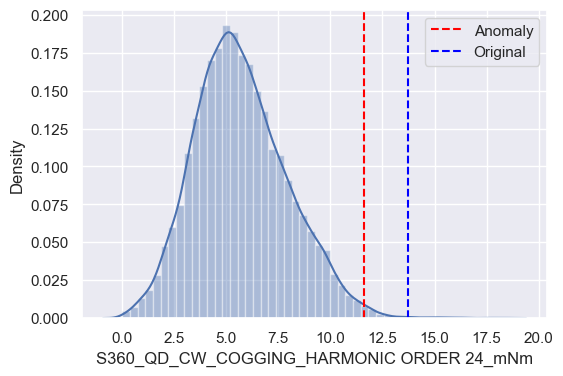

기존 임계값 ==> 13.75
0    20443
Name: S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64


Q3 + 1.5*IQR ==>  11.595899999999999
0    20292
1      151
Name: S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64
불량률= 0.7386391429829281 %


In [7]:
sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(55, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 55')
print(df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts()[1]/len(df_filter_1)*100,'%')
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(upper_cut)

print('============================================================================================================================')
print('\n')
print('============================================================================================================================')

sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(13.75, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 13.75')
print(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
#print('불량률=',df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts()[1]/len(df_filter_1)*100,'%')
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(7)

print('============================================================================================================================')
print('\n')
print('============================================================================================================================')

sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(13.75, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 13.75')
print(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(upper_cut)


print('============================================================================================================================')
print('\n')
print('============================================================================================================================')

sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(13.75, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 13.75')
print(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(upper_cut)

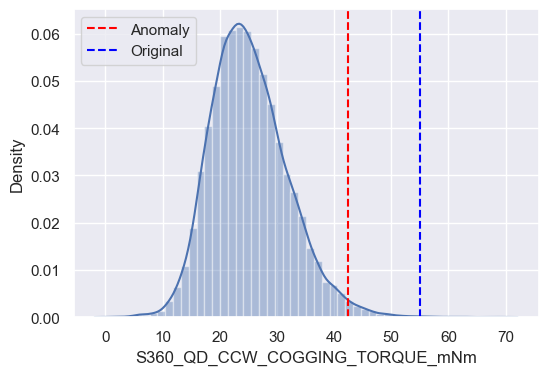

기존 임계값 ==> 55
0    20433
1       10
Name: S360_QD_CCW_COGGING_TORQUE_mNm, dtype: int64
불량률= 0.04891649953529325 %


Q3 + 1.5*IQR ==>  42.495
0    20169
1      274
Name: S360_QD_CCW_COGGING_TORQUE_mNm, dtype: int64
불량률= 1.340312087267035 %




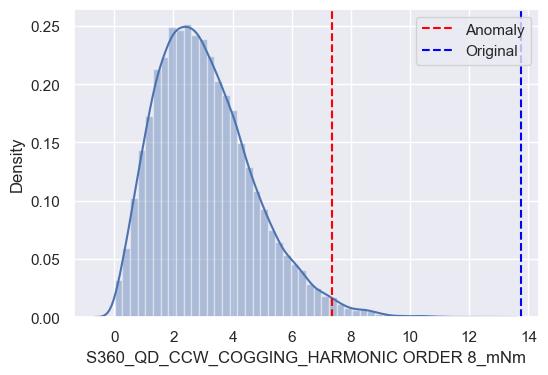

기존 임계값 ==> 13.75
0    20443
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


Q3 + 1.5*IQR ==>  7.355975
0    20139
1      304
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
불량률= 1.4870615858729148 %




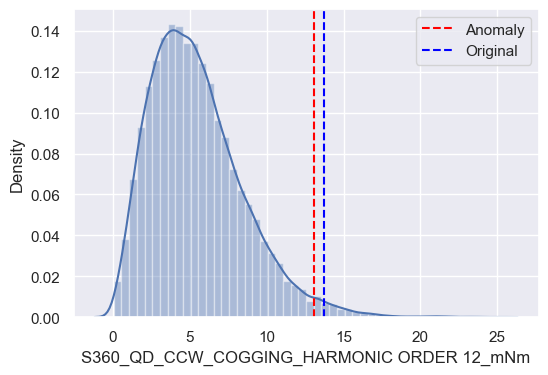

기존 임계값 ==> 13.75
0    20443
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64


Q3 + 1.5*IQR ==>  13.046475
0    20018
1      425
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64
불량률= 0.16142444846646775 %




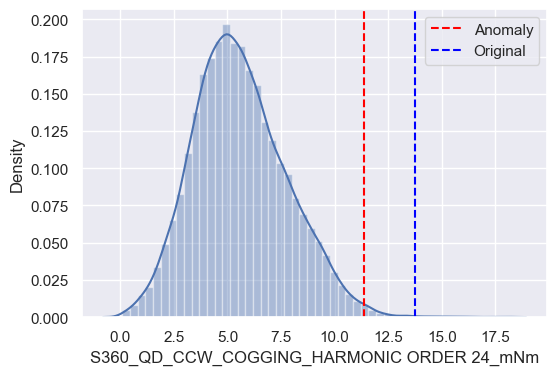

기존 임계값 ==> 13.75
0    20443
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64


Q3 + 1.5*IQR ==>  11.371850000000002
0    20293
1      150
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64
불량률= 0.7337474930293988 %


In [8]:
sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(55, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 55')
print(df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts()[1]/len(df_filter_1)*100,'%')
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CCW_COGGING_TORQUE_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(upper_cut)

print('============================================================================================================================')
print('\n')
print('============================================================================================================================')


sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(13.75, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 13.75')
print(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(7)

print('============================================================================================================================')
print('\n')
print('============================================================================================================================')

sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(13.75, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 13.75')
print(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(upper_cut)

print('============================================================================================================================')
print('\n')
print('============================================================================================================================')

sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
plt.grid(True)
sns.distplot(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'])
Q1 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'].values, 25)
Q3 = np.percentile(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'].values, 75)
IQR = Q3 - Q1
upper_cut = Q3 + 1.5*IQR
plt.axvline(upper_cut, color='red', linestyle='dashed',label='Anomaly')
plt.axvline(13.75, color='blue', linestyle='dashed',label='Original')
plt.legend()
plt.show()
print('기존 임계값 ==> 13.75')
print(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x>55 else 0).value_counts())
print('\n')
print('Q3 + 1.5*IQR ==> ',upper_cut)
print(df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x> upper_cut else 0).value_counts())
print('불량률=',df_filter_1['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'].apply(lambda x: 1 if x>upper_cut else 0).value_counts()[1]/len(df_filter_1)*100,'%')
thresholds.append(upper_cut)

In [9]:
#### --> Target [0,1] 변환 위한 기존 Cogging_Torque수치 임계값 선택 완료 
thresholds

[40.9525,
 7,
 13.04215,
 11.595899999999999,
 42.495,
 7,
 13.046475,
 11.371850000000002]

In [10]:
#### 3.) Target 불량률 측정 --> Labeling 측정 결과 [ 엑셀 기준점 참고 ] 

### 3-1.) CW 
df[col_CW[0]] = df[col_CW[0]].apply(lambda x: 1 if x>thresholds[0] else 0)
df[col_CW[1]] = df[col_CW[1]].apply(lambda x: 1 if x> 7.5 else 0) # 8 , thresholds[1]
df[col_CW[2]] = df[col_CW[2]].apply(lambda x: 1 if x> thresholds[2] else 0)
df[col_CW[3]] = df[col_CW[3]].apply(lambda x: 1 if x> thresholds[3] else 0)

### 3-2.) CCW 
df[col_CCW[0]] = df[col_CCW[0]].apply(lambda x: 1 if x>thresholds[4] else 0)
df[col_CCW[1]] = df[col_CCW[1]].apply(lambda x: 1 if x> 7.5 else 0) # 6 , thresholds[5]
df[col_CCW[2]] = df[col_CCW[2]].apply(lambda x: 1 if x> thresholds[6] else 0)
df[col_CCW[3]] = df[col_CCW[3]].apply(lambda x: 1 if x> thresholds[7] else 0)

In [11]:
print('CW')
for i in range(4):
    print(df[col_CW[i]].value_counts())
    print('\n')

CW
0    20242
1      277
Name: S360_QD_CW_COGGING_TORQUE_mNm, dtype: int64


0    20259
1      260
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    20100
1      419
Name: S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64


0    20368
1      151
Name: S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64




In [12]:
print('CCW')
for i in range(4):
    print(df[col_CCW[i]].value_counts())
    print('\n')

CCW
0    20245
1      274
Name: S360_QD_CCW_COGGING_TORQUE_mNm, dtype: int64


0    20255
1      264
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    20093
1      426
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64


0    20369
1      150
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64




In [14]:
#### 결측 확인 & 제거 
df_filter_2 = df[col_S230 + col_S240 + col_CW + col_CCW].dropna().reset_index(drop=True)
#print(df_filter_2.shape)
#describex(df_filter_2[col_STACK])

#for i in range(4):
#    if i !=1:
#        display(df_filter_2[[col_CW[i]] + col_S230 + col_STACK].corr())
#    else:
#        pass


#for i in range(4):
#    if i !=1:
#        display(df_filter_2[[col_CCW[i]] + col_S230 + col_STACK].corr())
#    else:
#        pass

In [15]:
#### df_filter_1 --> 기존 target 수치형 분포  
#### df_filter_2 --> [0,1] 이진분류 target 변경 (최종 학습용)

df_filter_1.shape, df_filter_2.shape

((20443, 19), (20443, 19))

In [16]:
X = df_filter_2[df_filter_2.columns.tolist()[1:11]]#.drop(['S230_QD_MAGN_VOLTAGE_V'],axis=1)
y = df_filter_2['S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm'] # S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 
models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

0    16031
1      323
Name: S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64 0    118
1     95
Name: S360_QD_CW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64


In [17]:
# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[118   0]
 [ 95   0]]


정확도: 0.554 정밀도: 0.0 재현율: 0.0 AUC: 0.5712310437109723 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71       118
          불량       0.00      0.00      0.00        95

    accuracy                           0.55       213
   macro avg       0.28      0.50      0.36       213
weighted avg       0.31      0.55      0.39       213

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[118   0]
 [ 95   0]]


정확도: 0.554 정밀도: 0.0 재현율: 0.0 AUC: 0.6007136485280999 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71       118
          불량       0.00      0.00      0.00        95

    accuracy                           0.55       21

In [18]:
for i in range(0,len(models)):
    Undersampling_Test(models[i])

Confusion Matrix
[[100  18]
 [ 54  41]]


정확도: 0.662 정밀도: 0.695 재현율: 0.432 AUC: 0.6363960749330955 F1: 0.532


              precision    recall  f1-score   support

          양품       0.65      0.85      0.74       118
          불량       0.69      0.43      0.53        95

    accuracy                           0.66       213
   macro avg       0.67      0.64      0.63       213
weighted avg       0.67      0.66      0.64       213

RandomForest ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[93 25]
 [53 42]]


정확도: 0.634 정밀도: 0.627 재현율: 0.442 AUC: 0.6512488849241748 F1: 0.519


              precision    recall  f1-score   support

          양품       0.64      0.79      0.70       118
          불량       0.63      0.44      0.52        95

    accuracy                           0.63       213
   macro avg       0.63      0.62      0.61       213
weighted avg       0.63      0.63     

Confusion Matrix
[[82 36]
 [47 48]]


정확도: 0.61 정밀도: 0.571 재현율: 0.505 AUC: 0.6425958965209635 F1: 0.536


              precision    recall  f1-score   support

          양품       0.64      0.69      0.66       118
          불량       0.57      0.51      0.54        95

    accuracy                           0.61       213
   macro avg       0.60      0.60      0.60       213
weighted avg       0.61      0.61      0.61       213

RandomForest(Balanced Weight) ROS=0.95 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[70 48]
 [42 53]]


정확도: 0.577 정밀도: 0.525 재현율: 0.558 AUC: 0.6168599464763604 F1: 0.541


              precision    recall  f1-score   support

          양품       0.62      0.59      0.61       118
          불량       0.52      0.56      0.54        95

    accuracy                           0.58       213
   macro avg       0.57      0.58      0.57       213
weighted avg       0.58   

Confusion Matrix
[[75 43]
 [46 49]]


정확도: 0.582 정밀도: 0.533 재현율: 0.516 AUC: 0.5887600356824264 F1: 0.524


              precision    recall  f1-score   support

          양품       0.62      0.64      0.63       118
          불량       0.53      0.52      0.52        95

    accuracy                           0.58       213
   macro avg       0.58      0.58      0.58       213
weighted avg       0.58      0.58      0.58       213

GradientBoostingMachine ROS=0.9 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[69 49]
 [44 51]]


정확도: 0.563 정밀도: 0.51 재현율: 0.537 AUC: 0.5985727029438002 F1: 0.523


              precision    recall  f1-score   support

          양품       0.61      0.58      0.60       118
          불량       0.51      0.54      0.52        95

    accuracy                           0.56       213
   macro avg       0.56      0.56      0.56       213
weighted avg       0.57      0.56

Confusion Matrix
[[38 80]
 [22 73]]


정확도: 0.521 정밀도: 0.477 재현율: 0.768 AUC: 0.6067796610169491 F1: 0.589


              precision    recall  f1-score   support

          양품       0.63      0.32      0.43       118
          불량       0.48      0.77      0.59        95

    accuracy                           0.52       213
   macro avg       0.56      0.55      0.51       213
weighted avg       0.56      0.52      0.50       213

XGBoost(Balanced Weight) ROS=0.9 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[33 85]
 [26 69]]


정확도: 0.479 정밀도: 0.448 재현율: 0.726 AUC: 0.5614629794826048 F1: 0.554


              precision    recall  f1-score   support

          양품       0.56      0.28      0.37       118
          불량       0.45      0.73      0.55        95

    accuracy                           0.48       213
   macro avg       0.50      0.50      0.46       213
weighted avg       0.51      0.

Confusion Matrix
[[ 14 104]
 [  6  89]]


정확도: 0.484 정밀도: 0.461 재현율: 0.937 AUC: 0.6454950936663694 F1: 0.618


              precision    recall  f1-score   support

          양품       0.70      0.12      0.20       118
          불량       0.46      0.94      0.62        95

    accuracy                           0.48       213
   macro avg       0.58      0.53      0.41       213
weighted avg       0.59      0.48      0.39       213

LightGBM(Balanced Weight) ROS=0.85 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[ 12 106]
 [  3  92]]


정확도: 0.488 정밀도: 0.465 재현율: 0.968 AUC: 0.6402319357716325 F1: 0.628


              precision    recall  f1-score   support

          양품       0.80      0.10      0.18       118
          불량       0.46      0.97      0.63        95

    accuracy                           0.49       213
   macro avg       0.63      0.54      0.40       213
weighted avg       0.

In [19]:
X = df_filter_2[df_filter_2.columns.tolist()[1:11]]#.drop(['S230_QD_MAGN_VOLTAGE_V'],axis=1)
y = df_filter_2['S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm'] # S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 
models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

0    16025
1      329
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64 0    120
1     96
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 12_mNm, dtype: int64


In [20]:
for i in range(0,len(models)):
    Undersampling_Test(models[i])

Confusion Matrix
[[108  12]
 [ 60  36]]


정확도: 0.667 정밀도: 0.75 재현율: 0.375 AUC: 0.6485677083333333 F1: 0.5


              precision    recall  f1-score   support

          양품       0.64      0.90      0.75       120
          불량       0.75      0.38      0.50        96

    accuracy                           0.67       216
   macro avg       0.70      0.64      0.62       216
weighted avg       0.69      0.67      0.64       216

RandomForest ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[101  19]
 [ 51  45]]


정확도: 0.676 정밀도: 0.703 재현율: 0.469 AUC: 0.6461805555555558 F1: 0.562


              precision    recall  f1-score   support

          양품       0.66      0.84      0.74       120
          불량       0.70      0.47      0.56        96

    accuracy                           0.68       216
   macro avg       0.68      0.66      0.65       216
weighted avg       0.68      0.68    

Confusion Matrix
[[76 44]
 [40 56]]


정확도: 0.611 정밀도: 0.56 재현율: 0.583 AUC: 0.6490017361111112 F1: 0.571


              precision    recall  f1-score   support

          양품       0.66      0.63      0.64       120
          불량       0.56      0.58      0.57        96

    accuracy                           0.61       216
   macro avg       0.61      0.61      0.61       216
weighted avg       0.61      0.61      0.61       216

RandomForest(Balanced Weight) ROS=1.0 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[91 29]
 [59 37]]


정확도: 0.593 정밀도: 0.561 재현율: 0.385 AUC: 0.586892361111111 F1: 0.457


              precision    recall  f1-score   support

          양품       0.61      0.76      0.67       120
          불량       0.56      0.39      0.46        96

    accuracy                           0.59       216
   macro avg       0.58      0.57      0.57       216
weighted avg       0.59     

Confusion Matrix
[[63 57]
 [39 57]]


정확도: 0.556 정밀도: 0.5 재현율: 0.594 AUC: 0.6308159722222222 F1: 0.543


              precision    recall  f1-score   support

          양품       0.62      0.53      0.57       120
          불량       0.50      0.59      0.54        96

    accuracy                           0.56       216
   macro avg       0.56      0.56      0.56       216
weighted avg       0.57      0.56      0.56       216

GradientBoostingMachine ROS=0.95 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[62 58]
 [34 62]]


정확도: 0.574 정밀도: 0.517 재현율: 0.646 AUC: 0.6231770833333333 F1: 0.574


              precision    recall  f1-score   support

          양품       0.65      0.52      0.57       120
          불량       0.52      0.65      0.57        96

    accuracy                           0.57       216
   macro avg       0.58      0.58      0.57       216
weighted avg       0.59      0.57

Confusion Matrix
[[43 77]
 [19 77]]


정확도: 0.556 정밀도: 0.5 재현율: 0.802 AUC: 0.6504340277777778 F1: 0.616


              precision    recall  f1-score   support

          양품       0.69      0.36      0.47       120
          불량       0.50      0.80      0.62        96

    accuracy                           0.56       216
   macro avg       0.60      0.58      0.54       216
weighted avg       0.61      0.56      0.54       216

XGBoost(Balanced Weight) ROS=0.95 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[37 83]
 [21 75]]


정확도: 0.519 정밀도: 0.475 재현율: 0.781 AUC: 0.6207465277777777 F1: 0.591


              precision    recall  f1-score   support

          양품       0.64      0.31      0.42       120
          불량       0.47      0.78      0.59        96

    accuracy                           0.52       216
   macro avg       0.56      0.54      0.50       216
weighted avg       0.57      0.5

Confusion Matrix
[[ 18 102]
 [ 12  84]]


정확도: 0.472 정밀도: 0.452 재현율: 0.875 AUC: 0.625607638888889 F1: 0.596


              precision    recall  f1-score   support

          양품       0.60      0.15      0.24       120
          불량       0.45      0.88      0.60        96

    accuracy                           0.47       216
   macro avg       0.53      0.51      0.42       216
weighted avg       0.53      0.47      0.40       216

LightGBM(Balanced Weight) ROS=0.9 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[  9 111]
 [  7  89]]


정확도: 0.454 정밀도: 0.445 재현율: 0.927 AUC: 0.6341145833333334 F1: 0.601


              precision    recall  f1-score   support

          양품       0.56      0.07      0.13       120
          불량       0.45      0.93      0.60        96

    accuracy                           0.45       216
   macro avg       0.50      0.50      0.37       216
weighted avg       0.51

In [21]:
df_filter_2.columns.tolist()[1:11]

['S230_QD_MAGN_VOLTAGE_V',
 'S230_QD_TEMPERATURE',
 'S240_QD_STACK_A_AREASUM',
 'S240_QD_STACK_B_AREASUM',
 'S240_QD_STACK_A-B Skew',
 'S240_QD_STACK_A-C Skew',
 'S240_QD_STACK_A Angle',
 'S240_QD_STACK_B Angle',
 'S240_QD_STACK_C Angle',
 'S240_QD_STACK_B-C Skew']

In [22]:
X = df_filter_2[df_filter_2.columns.tolist()[1:11]]#.drop(['S230_QD_MAGN_VOLTAGE_V'],axis=1)
y = df_filter_2['S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm'] # S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 
models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

0    16235
1      119
Name: S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64 0    40
1    32
Name: S360_QD_CW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64


In [23]:
# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[40  0]
 [32  0]]


정확도: 0.556 정밀도: 0.0 재현율: 0.0 AUC: 0.7277343749999999 F1: 0.0


              precision    recall  f1-score   support

          양품       0.56      1.00      0.71        40
          불량       0.00      0.00      0.00        32

    accuracy                           0.56        72
   macro avg       0.28      0.50      0.36        72
weighted avg       0.31      0.56      0.40        72

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[40  0]
 [32  0]]


정확도: 0.556 정밀도: 0.0 재현율: 0.0 AUC: 0.835546875 F1: 0.0


              precision    recall  f1-score   support

          양품       0.56      1.00      0.71        40
          불량       0.00      0.00      0.00        32

    accuracy                           0.56        72
   macro avg 

In [24]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])

In [25]:
Undersampling_Test(models[4])

Confusion Matrix
[[35  5]
 [ 7 25]]


정확도: 0.833 정밀도: 0.833 재현율: 0.781 AUC: 0.9156249999999999 F1: 0.806


              precision    recall  f1-score   support

          양품       0.83      0.88      0.85        40
          불량       0.83      0.78      0.81        32

    accuracy                           0.83        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.83      0.83      0.83        72

XGBoost ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[34  6]
 [ 6 26]]


정확도: 0.833 정밀도: 0.812 재현율: 0.812 AUC: 0.8984375 F1: 0.812


              precision    recall  f1-score   support

          양품       0.85      0.85      0.85        40
          불량       0.81      0.81      0.81        32

    accuracy                           0.83        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.83      0.83      0.83        72

X

In [26]:
X = df_filter_2[df_filter_2.columns.tolist()[1:11]]#.drop(['S230_QD_MAGN_VOLTAGE_V'],axis=1)
y = df_filter_2['S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm'] # S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

0    16236
1      118
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64 0    40
1    32
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 24_mNm, dtype: int64


In [27]:
# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[40  0]
 [32  0]]


정확도: 0.556 정밀도: 0.0 재현율: 0.0 AUC: 0.685546875 F1: 0.0


              precision    recall  f1-score   support

          양품       0.56      1.00      0.71        40
          불량       0.00      0.00      0.00        32

    accuracy                           0.56        72
   macro avg       0.28      0.50      0.36        72
weighted avg       0.31      0.56      0.40        72

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[40  0]
 [32  0]]


정확도: 0.556 정밀도: 0.0 재현율: 0.0 AUC: 0.7390625000000001 F1: 0.0


              precision    recall  f1-score   support

          양품       0.56      1.00      0.71        40
          불량       0.00      0.00      0.00        32

    accuracy                           0.56        72
   macro avg 

In [28]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])

In [29]:
Undersampling_Test(models[3])

Confusion Matrix
[[33  7]
 [10 22]]


정확도: 0.764 정밀도: 0.759 재현율: 0.688 AUC: 0.84453125 F1: 0.721


              precision    recall  f1-score   support

          양품       0.77      0.82      0.80        40
          불량       0.76      0.69      0.72        32

    accuracy                           0.76        72
   macro avg       0.76      0.76      0.76        72
weighted avg       0.76      0.76      0.76        72

GradientBoostingMachine ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[34  6]
 [ 8 24]]


정확도: 0.806 정밀도: 0.8 재현율: 0.75 AUC: 0.8390625 F1: 0.774


              precision    recall  f1-score   support

          양품       0.81      0.85      0.83        40
          불량       0.80      0.75      0.77        32

    accuracy                           0.81        72
   macro avg       0.80      0.80      0.80        72
weighted avg       0.81      0.81      0.80        

#### 2.) 병렬공정 분석
- CW, CCW Harmonic Order 대상
- Cogging_Torque Harmonic Order 분포 이상값 정의
- Cogging_Torque Harmonic Order 이상값 경계선 기준 Target= 0,1로 변환 (정상/불량)
- 지도학습 모델링 적용

In [30]:
### 병렬공정 인자 & 주요 인자 & Target 총합 

#### 1.) S32 + S70 
df_parallel_1_1 = df[parallel_1 + [col_CW[1]]].dropna().reset_index(drop=True)
df_parallel_1_2 = df[parallel_1 + [col_CCW[1]]].dropna().reset_index(drop=True)

#### 2.) S32 + S71
df_parallel_2_1 = df[parallel_2 + [col_CW[1]]].dropna().reset_index(drop=True)
df_parallel_2_2 = df[parallel_2 + [col_CCW[1]]].dropna().reset_index(drop=True)

#### 3.) S34 + S70
df_parallel_3_1 = df[parallel_3 + [col_CW[1]]].dropna().reset_index(drop=True)
df_parallel_3_2 = df[parallel_3 + [col_CCW[1]]].dropna().reset_index(drop=True)

#### 4.) S34 + S71
df_parallel_4_1 = df[parallel_4 + [col_CW[1]]].dropna().reset_index(drop=True)
df_parallel_4_2 = df[parallel_4 + [col_CCW[1]]].dropna().reset_index(drop=True)

print('CW ==>',df_parallel_1_1.shape, df_parallel_2_1.shape , df_parallel_3_1.shape , df_parallel_4_1.shape)
print('CCW ==>',df_parallel_1_2.shape, df_parallel_2_2.shape , df_parallel_3_2.shape , df_parallel_4_2.shape)

CW ==> (4991, 20) (4736, 20) (5426, 20) (5318, 20)
CCW ==> (4991, 20) (4736, 20) (5426, 20) (5318, 20)


In [31]:
print(df_parallel_1_1[col_CW[1]].value_counts())
print('\n')
print(df_parallel_1_2[col_CCW[1]].value_counts())
print('\n')
print(df_parallel_2_1[col_CW[1]].value_counts())
print('\n')
print(df_parallel_2_2[col_CCW[1]].value_counts())
print('\n')
print(df_parallel_3_1[col_CW[1]].value_counts())
print('\n')
print(df_parallel_3_2[col_CCW[1]].value_counts())
print('\n')
print(df_parallel_4_1[col_CW[1]].value_counts())
print('\n')
print(df_parallel_4_2[col_CCW[1]].value_counts())

0    4892
1      99
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    4884
1     107
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    4671
1      65
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    4671
1      65
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    5364
1      62
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    5369
1      57
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    5286
1      32
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


0    5285
1      33
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


#### 병렬공정 기초 조합식 

In [32]:
##### 1.) 
#X = df_parallel_1_1[df_parallel_1_1.columns.tolist()[:-1]]
#y = df_parallel_1_1[col_CW[1]]

##### 2.) 
#X = df_parallel_1_2[df_parallel_1_2.columns.tolist()[:-1]]
#y = df_parallel_1_2[col_CCW[1]]

##### 3.) 
#X = df_parallel_2_1[df_parallel_2_1.columns.tolist()[:-1]]
#y = df_parallel_2_1[col_CW[1]]

##### 4.) 
#X = df_parallel_2_2[df_parallel_2_2.columns.tolist()[:-1]]
#y = df_parallel_2_2[col_CCW[1]]

##### 5.) 
#X = df_parallel_3_1[df_parallel_3_1.columns.tolist()[:-1]]
#y = df_parallel_3_1[col_CW[1]]

##### 6.) 
#X = df_parallel_3_2[df_parallel_3_2.columns.tolist()[:-1]]
#y = df_parallel_3_2[col_CCW[1]]

##### 7.) 
#X = df_parallel_4_1[df_parallel_4_1.columns.tolist()[:-1]]
#y = df_parallel_4_1[col_CW[1]]

##### 8.) 
#X = df_parallel_4_2[df_parallel_4_2.columns.tolist()[:-1]]
#y = df_parallel_4_2[col_CCW[1]]

In [33]:
X = df_parallel_1_1[df_parallel_1_1.columns.tolist()[:-1]]
y = df_parallel_1_1[col_CW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
#for i in range(0,len(models)):

#    model = models[i]
#    test_model(model) 

0    3921
1      71
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    35
1    28
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


In [34]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [35]:
X = df_parallel_1_2[df_parallel_1_2.columns.tolist()[:-1]]
y = df_parallel_1_2[col_CCW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
#for i in range(0,len(models)):

#    model = models[i]
#    test_model(model) 
    
#print('\n')
#print('============================================================================================')

0    3913
1      79
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    35
1    28
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64


In [36]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [37]:
X = df_parallel_2_1[df_parallel_2_1.columns.tolist()[:-1]]
y = df_parallel_2_1[col_CW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 
    
print('\n')
print('============================================================================================')


0    3733
1      55
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    12
1    10
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[12  0]
 [10  0]]


정확도: 0.545 정밀도: 0.0 재현율: 0.0 AUC: 0.5583333333333333 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71        12
          불량       0.00      0.00      0.00        10

    accuracy                           0.55        22
   macro avg       0.27      0.50      0.35        22
weighted avg       0.30      0.55      0.39        22

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[12  0]
 [10  0]]


정확도: 0.545 정밀도: 0.0 재현율: 0.0 AUC: 0.5249999999999999 F1: 0.0


              precision    recall  f1-score   support

          양품 

In [38]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [39]:
Undersampling_Test(models[1])

Confusion Matrix
[[11  1]
 [ 5  5]]


정확도: 0.727 정밀도: 0.833 재현율: 0.5 AUC: 0.8333333333333333 F1: 0.625


              precision    recall  f1-score   support

          양품       0.69      0.92      0.79        12
          불량       0.83      0.50      0.62        10

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.71        22
weighted avg       0.75      0.73      0.71        22

RandomForest(Balanced Weight) ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[11  1]
 [ 6  4]]


정확도: 0.682 정밀도: 0.8 재현율: 0.4 AUC: 0.825 F1: 0.533


              precision    recall  f1-score   support

          양품       0.65      0.92      0.76        12
          불량       0.80      0.40      0.53        10

    accuracy                           0.68        22
   macro avg       0.72      0.66      0.65        22
weighted avg       0.72      0.68      0.66 

In [40]:
X = df_parallel_2_2[df_parallel_2_2.columns.tolist()[:-1]]
y = df_parallel_2_2[col_CCW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

0    3733
1      55
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    12
1    10
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[12  0]
 [10  0]]


정확도: 0.545 정밀도: 0.0 재현율: 0.0 AUC: 0.4 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71        12
          불량       0.00      0.00      0.00        10

    accuracy                           0.55        22
   macro avg       0.27      0.50      0.35        22
weighted avg       0.30      0.55      0.39        22

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[12  0]
 [10  0]]


정확도: 0.545 정밀도: 0.0 재현율: 0.0 AUC: 0.5416666666666666 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55   

In [41]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [42]:
Undersampling_Test(models[3])

Confusion Matrix
[[11  1]
 [ 4  6]]


정확도: 0.773 정밀도: 0.857 재현율: 0.6 AUC: 0.85 F1: 0.706


              precision    recall  f1-score   support

          양품       0.73      0.92      0.81        12
          불량       0.86      0.60      0.71        10

    accuracy                           0.77        22
   macro avg       0.80      0.76      0.76        22
weighted avg       0.79      0.77      0.77        22

GradientBoostingMachine ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[11  1]
 [ 5  5]]


정확도: 0.727 정밀도: 0.833 재현율: 0.5 AUC: 0.8583333333333334 F1: 0.625


              precision    recall  f1-score   support

          양품       0.69      0.92      0.79        12
          불량       0.83      0.50      0.62        10

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.71        22
weighted avg       0.75      0.73      0.71      

In [43]:
X = df_parallel_3_1[df_parallel_3_1.columns.tolist()[:-1]]
y = df_parallel_3_1[col_CW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

0    3749
1      49
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    16
1    13
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[16  0]
 [13  0]]


정확도: 0.552 정밀도: 0.0 재현율: 0.0 AUC: 0.6346153846153846 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71        16
          불량       0.00      0.00      0.00        13

    accuracy                           0.55        29
   macro avg       0.28      0.50      0.36        29
weighted avg       0.30      0.55      0.39        29

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[16  0]
 [13  0]]


정확도: 0.552 정밀도: 0.0 재현율: 0.0 AUC: 0.6322115384615384 F1: 0.0


              precision    recall  f1-score   support

          양품 

In [44]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [45]:
Undersampling_Test(models[1])

Confusion Matrix
[[14  2]
 [ 6  7]]


정확도: 0.724 정밀도: 0.778 재현율: 0.538 AUC: 0.7115384615384616 F1: 0.636


              precision    recall  f1-score   support

          양품       0.70      0.88      0.78        16
          불량       0.78      0.54      0.64        13

    accuracy                           0.72        29
   macro avg       0.74      0.71      0.71        29
weighted avg       0.73      0.72      0.71        29

RandomForest(Balanced Weight) ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[14  2]
 [ 6  7]]


정확도: 0.724 정밀도: 0.778 재현율: 0.538 AUC: 0.7740384615384616 F1: 0.636


              precision    recall  f1-score   support

          양품       0.70      0.88      0.78        16
          불량       0.78      0.54      0.64        13

    accuracy                           0.72        29
   macro avg       0.74      0.71      0.71        29
weighted avg       0.73  

In [46]:
X = df_parallel_3_2[df_parallel_3_2.columns.tolist()[:-1]]
y = df_parallel_3_2[col_CCW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

0    4020
1      49
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    10
1     8
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[10  0]
 [ 8  0]]


정확도: 0.556 정밀도: 0.0 재현율: 0.0 AUC: 0.6000000000000001 F1: 0.0


              precision    recall  f1-score   support

          양품       0.56      1.00      0.71        10
          불량       0.00      0.00      0.00         8

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[10  0]
 [ 8  0]]


정확도: 0.556 정밀도: 0.0 재현율: 0.0 AUC: 0.4875 F1: 0.0


              precision    recall  f1-score   support

          양품       0.56

In [47]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [48]:
Undersampling_Test(models[2])

Confusion Matrix
[[7 3]
 [4 4]]


정확도: 0.611 정밀도: 0.571 재현율: 0.5 AUC: 0.5 F1: 0.533


              precision    recall  f1-score   support

          양품       0.64      0.70      0.67        10
          불량       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18

AdaBoost ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[7 3]
 [6 2]]


정확도: 0.5 정밀도: 0.4 재현율: 0.25 AUC: 0.3625 F1: 0.308


              precision    recall  f1-score   support

          양품       0.54      0.70      0.61        10
          불량       0.40      0.25      0.31         8

    accuracy                           0.50        18
   macro avg       0.47      0.47      0.46        18
weighted avg       0.48      0.50      0.47        18

AdaBoost ROS=0.7 Prediction Resul

In [49]:
X = df_parallel_4_1[df_parallel_4_1.columns.tolist()[:-1]]
y = df_parallel_4_1[col_CW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

0    3434
1      22
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    12
1    10
Name: S360_QD_CW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[12  0]
 [10  0]]


정확도: 0.545 정밀도: 0.0 재현율: 0.0 AUC: 0.625 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71        12
          불량       0.00      0.00      0.00        10

    accuracy                           0.55        22
   macro avg       0.27      0.50      0.35        22
weighted avg       0.30      0.55      0.39        22

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[12  0]
 [10  0]]


정확도: 0.545 정밀도: 0.0 재현율: 0.0 AUC: 0.5666666666666668 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55   

In [50]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [51]:
Undersampling_Test(models[6])

Confusion Matrix
[[11  1]
 [ 5  5]]


정확도: 0.727 정밀도: 0.833 재현율: 0.5 AUC: 0.8666666666666666 F1: 0.625


              precision    recall  f1-score   support

          양품       0.69      0.92      0.79        12
          불량       0.83      0.50      0.62        10

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.71        22
weighted avg       0.75      0.73      0.71        22

LightGBM ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[11  1]
 [ 5  5]]


정확도: 0.727 정밀도: 0.833 재현율: 0.5 AUC: 0.875 F1: 0.625


              precision    recall  f1-score   support

          양품       0.69      0.92      0.79        12
          불량       0.83      0.50      0.62        10

    accuracy                           0.73        22
   macro avg       0.76      0.71      0.71        22
weighted avg       0.75      0.73      0.71        22

LightGBM

In [52]:
X = df_parallel_4_2[df_parallel_4_2.columns.tolist()[:-1]]
y = df_parallel_4_2[col_CCW[1]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2021)
ros_test = RandomUnderSampler(sampling_strategy=0.8,random_state=2021)   
X_test,y_test = ros_test.fit_resample(X_test,y_test)  

print(y_train.value_counts(),y_test.value_counts())

rf = RandomForestClassifier(random_state=2021)
rf_bal = RandomForestClassifier(random_state=2021,class_weight='balanced')
ada = AdaBoostClassifier(random_state=2021)
gbm = GradientBoostingClassifier(random_state=2021)
xgb = XGBClassifier(random_state=2021)
xgb_bal = XGBClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1])
lgbm =  LGBMClassifier(random_state=2021)
lgbm_bal = LGBMClassifier(random_state=2021,scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]) 

models = [rf,rf_bal,ada,gbm,xgb,xgb_bal,lgbm,lgbm_bal]

# 전체 모델  원큐 출력 
for i in range(0,len(models)):
    model = models[i]
    test_model(model) 

0    3964
1      24
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64 0    11
1     9
Name: S360_QD_CCW_COGGING_HARMONIC ORDER 8_mNm, dtype: int64
----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[11  0]
 [ 9  0]]


정확도: 0.55 정밀도: 0.0 재현율: 0.0 AUC: 0.47474747474747475 F1: 0.0


              precision    recall  f1-score   support

          양품       0.55      1.00      0.71        11
          불량       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20

RandomForest Prediction Result


----------------------------------------------------------------------------------------------------------
Confusion Matrix
[[11  0]
 [ 9  0]]


정확도: 0.55 정밀도: 0.0 재현율: 0.0 AUC: 0.5757575757575758 F1: 0.0


              precision    recall  f1-score   support

          양품

In [53]:
#for i in range(0,len(models)):
#    Undersampling_Test(models[i])
#    print('=================================================')
#    print('\n')

In [54]:
Undersampling_Test(models[3])

Confusion Matrix
[[10  1]
 [ 3  6]]


정확도: 0.8 정밀도: 0.857 재현율: 0.667 AUC: 0.6767676767676767 F1: 0.75


              precision    recall  f1-score   support

          양품       0.77      0.91      0.83        11
          불량       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20

GradientBoostingMachine ROS=0.65 Prediction Result
------------------------------------------------------------------------------------------------------


Confusion Matrix
[[9 2]
 [4 5]]


정확도: 0.7 정밀도: 0.714 재현율: 0.556 AUC: 0.6262626262626262 F1: 0.625


              precision    recall  f1-score   support

          양품       0.69      0.82      0.75        11
          불량       0.71      0.56      0.63         9

    accuracy                           0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0